In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df1=pd.read_csv('bengaluru_house_prices.csv')
df1.head()
len(df1)

13320

In [25]:
g=df1.groupby('area_type')

In [26]:
for area,area_df in g:
    print(area)
    print(area_df)

Built-up  Area
            area_type   availability               location       size  \
2      Built-up  Area  Ready To Move            Uttarahalli      3 BHK   
13     Built-up  Area  Ready To Move              Gottigere      2 BHK   
20     Built-up  Area  Ready To Move                Kengeri      1 BHK   
27     Built-up  Area         20-Dec             Whitefield      3 BHK   
34     Built-up  Area  Ready To Move          Kasturi Nagar      3 BHK   
...               ...            ...                    ...        ...   
13280  Built-up  Area  Ready To Move               Sarjapur      3 BHK   
13307  Built-up  Area  Ready To Move           Billekahalli      3 BHK   
13308  Built-up  Area  Ready To Move      Bannerghatta Road      3 BHK   
13315  Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13317  Built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   

       society total_sqft  bath  balcony  price  
2          NaN       1440   2.0      3.0   62.

In [3]:
df1.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [45]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(['availability','society','area_type','balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))
df3.head()

/var/folders/n6/6255r88x0hn5xpjkyt9mrmb00000gn/T/ipykernel_16879/2487300557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [10]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
# def isnot_float(x):
#     try:
#         float(x)
#         return False
#     except ValueError:
#         return True

df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [11]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None



In [12]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [13]:
df3.head(10)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [16]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [17]:
df4.loc[3]

location      Lingadheeranahalli
size                       3 BHK
total_sqft                1521.0
bath                         3.0
price                       95.0
bhk                            3
Name: 3, dtype: object

In [18]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
# df5['price_per_sqft']=df5.price*100000/df5.total_sqft
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
df5.groupby('location').agg('count')


,size,total_sqft,bath,price,bhk,price_per_sqft
location,,,,,,
1 Annasandrapalya,1,1,1,1,1,1
1 Giri Nagar,1,1,1,1,1,1
1 Immadihalli,1,1,1,1,1,1
1 Ramamurthy Nagar,1,1,1,1,1,1
12th cross srinivas nagar banshankari 3rd stage,1,1,1,1,1,1
...,...,...,...,...,...,...
t.c palya,1,1,1,1,1,1
tc.palya,4,4,4,4,4,4
vinayakanagar,1,1,1,1,1,1


In [22]:
df5.groupby('location')['location'].agg('count')

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [20]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
location_stats_lessthan10=location_stats[location_stats<=10]
print(location_stats_lessthan10)

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64


In [28]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_lessthan10 else x)
df5.head(50)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.00,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.00,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.00,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.00,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.00,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.00,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.00,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.00,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.00,6.0,370.00,6,36274.509804


In [30]:
len(df5.location.unique())

242

In [31]:
'''this line is written because we need to filter out the row for which each bedrrom size is less than 300
eg: if my totalsqft is 1056 ad the bhk is 2 so total bedroom size is 600 and now i am left with 456
eg: if my totalsqft is 1020 and the bhk is 6 so total bedrrom size is 3600 which is much more than the totalsqft
'''
df5[df5['total_sqft']/df5['bhk']<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [32]:
df5.shape


(13246, 7)

In [33]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [34]:
df6.shape

(12502, 7)

In [38]:
g=df6.groupby('location')
for location,location_df in g:
    print(location)
    print(location_df)

1st Block Jayanagar
                  location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_per_sqft  
210      15017.543860  
848      11901.840491  
2152     12533.333333  
2355     18750.000000  
4991      6000.000000  
7138     10833.333333  
7358     11983.805668  
7383  

In [39]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        print("mean:",m," std:",st)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [34]:
# # Group by 'location' and calculate mean and standard deviation
# grouped_stats = df6.groupby('location')['price_per_sqft'].agg(['mean', 'std'])

# # Display the statistics for each location
# print(grouped_stats)


In [41]:
df7=remove_pps_outliers(df6)
df7.head(10)

mean: 12359.253757566757  std: 3730.1654195657898
mean: 9726.405917927168  std: 4696.573415034759
mean: 4048.7011831449663  std: 643.3304399655544
mean: 14381.275720164609  std: 4970.900188596673
mean: 6622.1200762730805  std: 4328.589064980405
mean: 5125.691217297704  std: 1040.4791847067909
mean: 7326.205543307714  std: 2701.915827190839
mean: 6411.478264070508  std: 2279.0745890270437
mean: 5535.718520714686  std: 3374.087457024132
mean: 5065.94392836047  std: 2107.5606525500903
mean: 4841.77200833832  std: 863.2205938839423
mean: 4070.1948155956748  std: 1414.4094499037592
mean: 5546.576567351514  std: 1657.4897040469916
mean: 6323.831878099613  std: 1981.1277616414045
mean: 7447.72466192013  std: 2079.758767437019
mean: 6048.66921387891  std: 2807.8466852933207
mean: 4668.796240425284  std: 1127.8066960262986
mean: 3320.3352926715156  std: 1050.4196430278525
mean: 3705.4073142802217  std: 985.282459989774
mean: 5198.809311859628  std: 3060.1092773285895
mean: 6010.168506961792  st

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


In [36]:
df7.head(20)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


          location       size  total_sqft  bath  price  bhk  price_per_sqft
5737  Rajaji Nagar      2 BHK      1370.0   2.0  170.0    2    12408.759124
5740  Rajaji Nagar      2 BHK      1718.0   3.0  288.0    2    16763.678696
5743  Rajaji Nagar  2 Bedroom      1200.0   2.0  150.0    2    12500.000000
5744  Rajaji Nagar  2 Bedroom      1160.0   1.0  163.0    2    14051.724138
5746  Rajaji Nagar      2 BHK      1440.0   2.0  170.0    2    11805.555556
5748  Rajaji Nagar      2 BHK      1440.0   2.0  185.0    2    12847.222222
5755  Rajaji Nagar      2 BHK      1357.0   2.0  130.0    2     9579.955785
5762  Rajaji Nagar      2 BHK      1763.0   3.0  262.0    2    14861.032331
5769  Rajaji Nagar      2 BHK      1268.0   2.0  127.0    2    10015.772871
5772  Rajaji Nagar  2 Bedroom      1200.0   1.0  200.0    2    16666.666667
5788  Rajaji Nagar      2 BHK      1718.0   3.0  275.0    2    16006.984866
5789  Rajaji Nagar      2 BHK      1763.0   3.0  240.0    2    13613.159387
5792  Rajaji

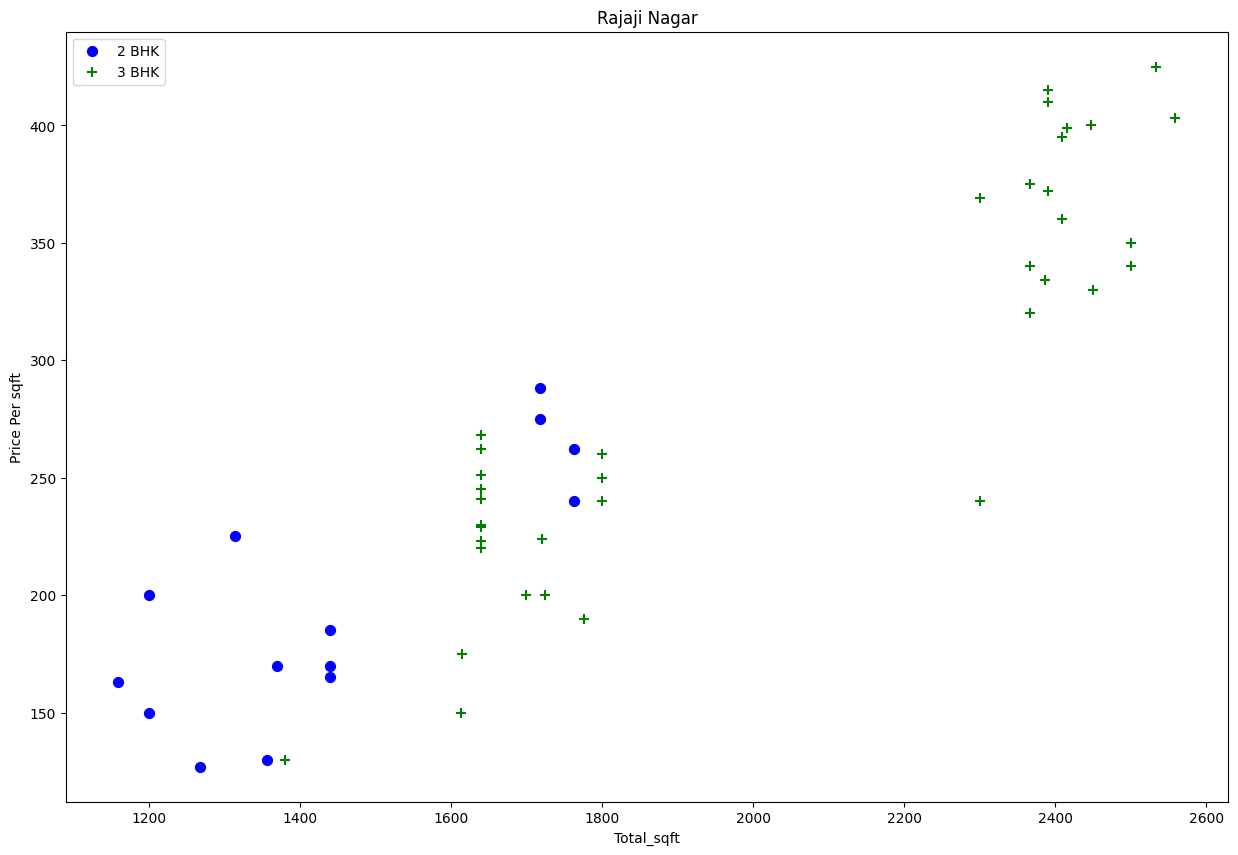

In [42]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    print(bhk2)
    bhk3=df[(df.location==location)&(df.bhk==3)]
    plt.figure(figsize=(15, 10))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total_sqft')
    plt.ylabel('Price Per sqft')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,"Rajaji Nagar")

In [43]:
df7.groupby('location')['bhk'].unique()


location
1st Block Jayanagar                                            [4, 3, 2]
1st Phase JP Nagar                                       [4, 3, 5, 2, 1]
2nd Phase Judicial Layout                                         [3, 2]
2nd Stage Nagarbhavi                                              [4, 6]
5th Block Hbr Layout                                        [2, 3, 5, 6]
                                                ...                     
Yelahanka                                             [3, 2, 1, 4, 5, 6]
Yelahanka New Town                                          [1, 3, 2, 4]
Yelenahalli                                                       [2, 3]
Yeshwanthpur                                             [3, 1, 4, 2, 6]
other                        [3, 2, 1, 4, 8, 11, 6, 7, 5, 10, 16, 9, 13]
Name: bhk, Length: 242, dtype: object

In [49]:
g=df6.groupby('location')
for location,location_df in g:
    # print(location)
    # print(location_df)
    for bhk,bhk_df in location_df.groupby('bhk'):
        print(bhk)
        print(bhk_df)

2
                 location   size  total_sqft  bath  price  bhk  price_per_sqft
4991  1st Block Jayanagar  2 BHK      1000.0   3.0   60.0    2     6000.000000
7358  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
3
                 location   size  total_sqft  bath  price  bhk  price_per_sqft
848   1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2152  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
7138  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
8507  1st Block Jayanagar  3 BHK      1760.0   3.0  115.0    3     6534.090909
4
                  location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

      

In [52]:
def remove_bhk_outliers(df):
    # Initialize an empty array to store indices of rows to be excluded
    exclude_indices = np.array([])
    
    # Group the DataFrame by 'location'
    for location, location_df in df.groupby('location'):
        # Initialize a dictionary to store statistics for each BHK type
        bhk_stats = {}
        
        # Group the location-specific DataFrame by 'bhk' (number of bedrooms)
        for bhk, bhk_df in location_df.groupby('bhk'):
            # Calculate mean, standard deviation, and count of 'price_per_sqft' for each BHK type
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        # Again, group the location-specific DataFrame by 'bhk'
        for bhk, bhk_df in location_df.groupby('bhk'):
            # Get the statistics for the previous BHK type (bhk-1)
            stats = bhk_stats.get(bhk - 1)
            
            # If statistics for the previous BHK type exist and count is greater than 5
            if stats and stats['count'] > 5:
                # Append indices of rows where 'price_per_sqft' is less than the mean of the previous BHK type
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    
    # Drop the rows with the indices stored in exclude_indices
    return df.drop(exclude_indices, axis='index')

# Apply the remove_bhk_outliers function to df7 and store the result in df8
df8 = remove_bhk_outliers(df7)

# Print the shape of df8
df8.shape


(7329, 7)

     location   size  total_sqft  bath   price  bhk  price_per_sqft
2796   Hebbal  2 BHK    1349.000   2.0   98.20    2     7279.466271
2801   Hebbal  2 BHK    1337.000   2.0   82.00    2     6133.133882
2802   Hebbal  2 BHK    1349.000   2.0   98.00    2     7264.640474
2806   Hebbal  2 BHK     687.325   2.0   42.72    2     6215.400284
2810   Hebbal  2 BHK    1080.000   2.0   54.00    2     5000.000000
2811   Hebbal  2 BHK     812.000   2.0   55.00    2     6773.399015
2813   Hebbal  2 BHK    1075.000   2.0   52.00    2     4837.209302
2818   Hebbal  2 BHK     823.000   2.0   50.63    2     6151.883354
2819   Hebbal  2 BHK    1420.000   2.0  123.00    2     8661.971831
2821   Hebbal  2 BHK    1420.000   2.0   99.39    2     6999.295775
2826   Hebbal  2 BHK    1420.000   2.0   99.39    2     6999.295775
2828   Hebbal  2 BHK    1440.000   2.0  115.00    2     7986.111111
2829   Hebbal  2 BHK    1100.000   2.0   54.00    2     4909.090909
2833   Hebbal  2 BHK    1420.000   2.0  107.00  

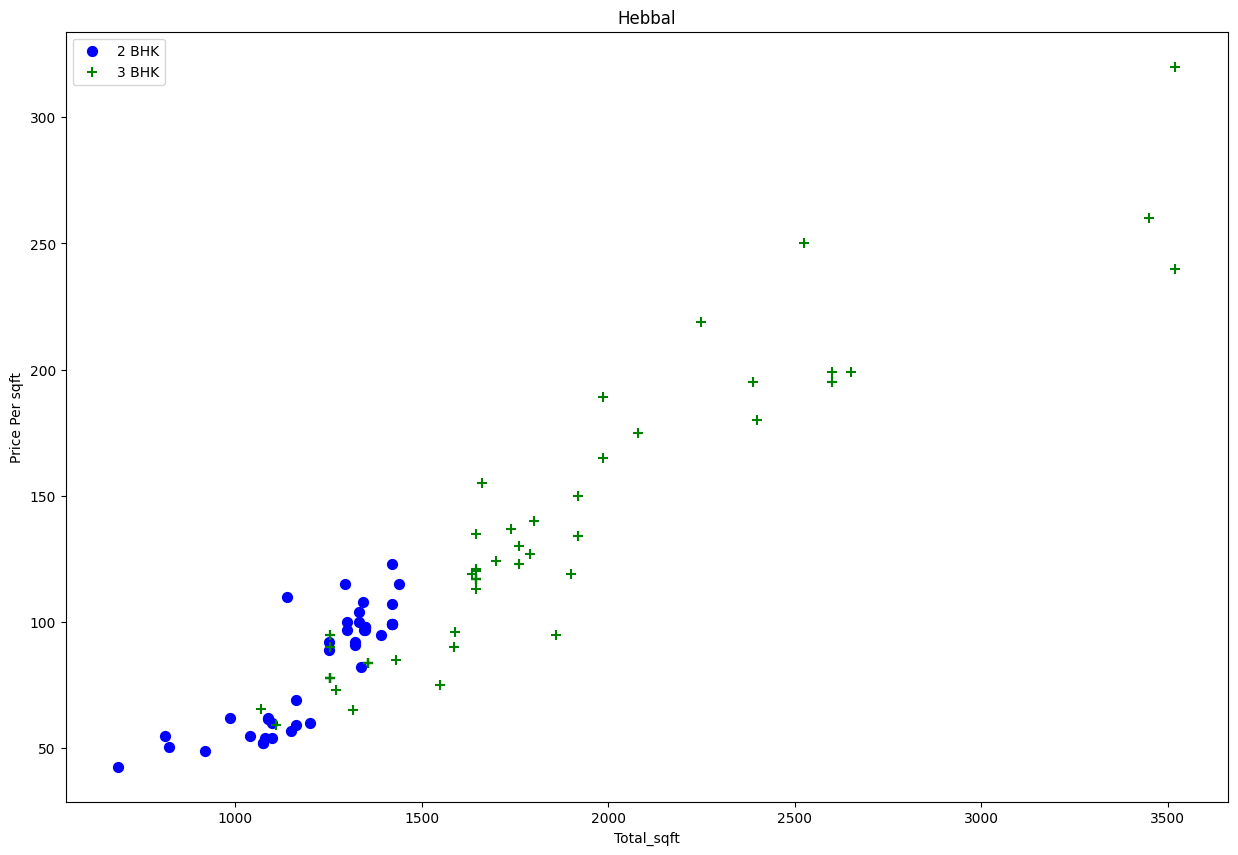

In [53]:
plot_scatter_chart(df7,"Hebbal")

     location   size  total_sqft  bath   price  bhk  price_per_sqft
2796   Hebbal  2 BHK    1349.000   2.0   98.20    2     7279.466271
2801   Hebbal  2 BHK    1337.000   2.0   82.00    2     6133.133882
2802   Hebbal  2 BHK    1349.000   2.0   98.00    2     7264.640474
2806   Hebbal  2 BHK     687.325   2.0   42.72    2     6215.400284
2810   Hebbal  2 BHK    1080.000   2.0   54.00    2     5000.000000
2811   Hebbal  2 BHK     812.000   2.0   55.00    2     6773.399015
2813   Hebbal  2 BHK    1075.000   2.0   52.00    2     4837.209302
2818   Hebbal  2 BHK     823.000   2.0   50.63    2     6151.883354
2819   Hebbal  2 BHK    1420.000   2.0  123.00    2     8661.971831
2821   Hebbal  2 BHK    1420.000   2.0   99.39    2     6999.295775
2826   Hebbal  2 BHK    1420.000   2.0   99.39    2     6999.295775
2828   Hebbal  2 BHK    1440.000   2.0  115.00    2     7986.111111
2829   Hebbal  2 BHK    1100.000   2.0   54.00    2     4909.090909
2833   Hebbal  2 BHK    1420.000   2.0  107.00  

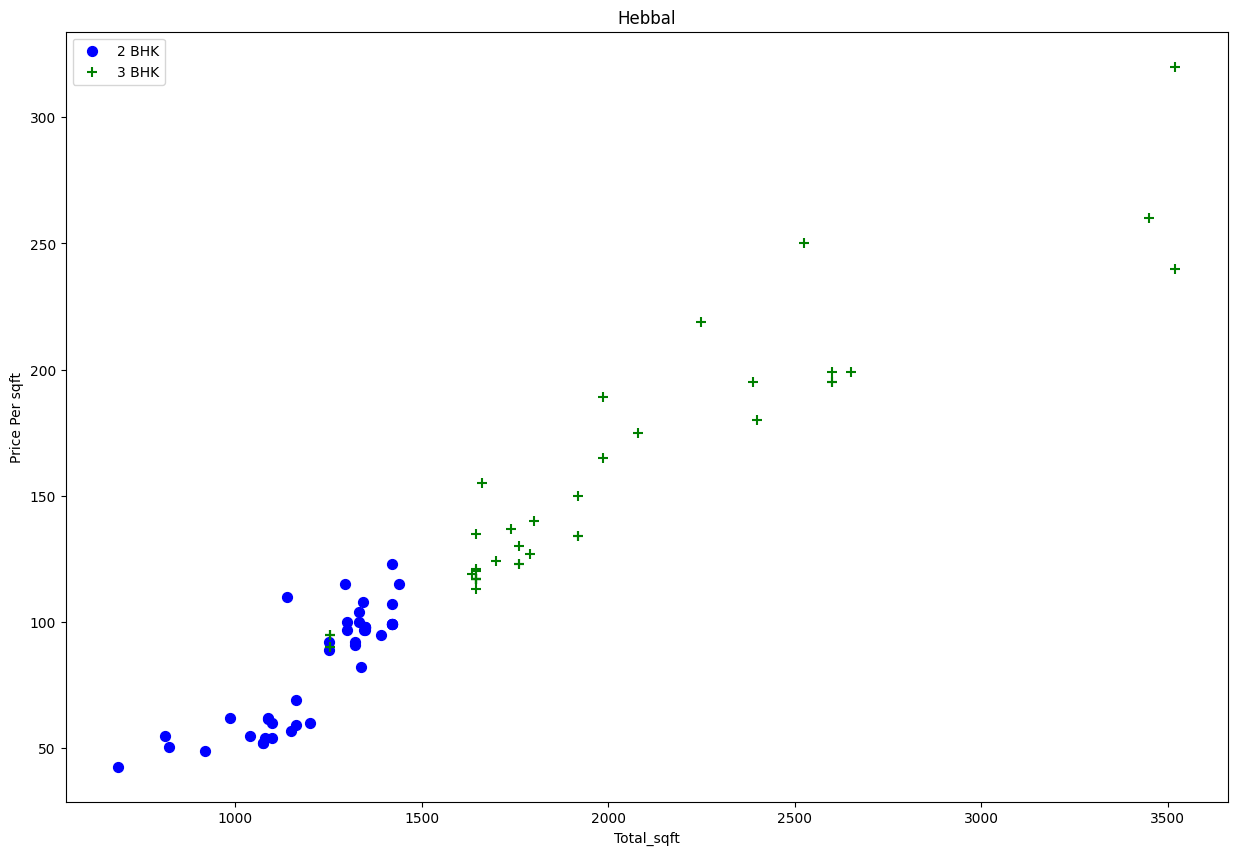

In [54]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

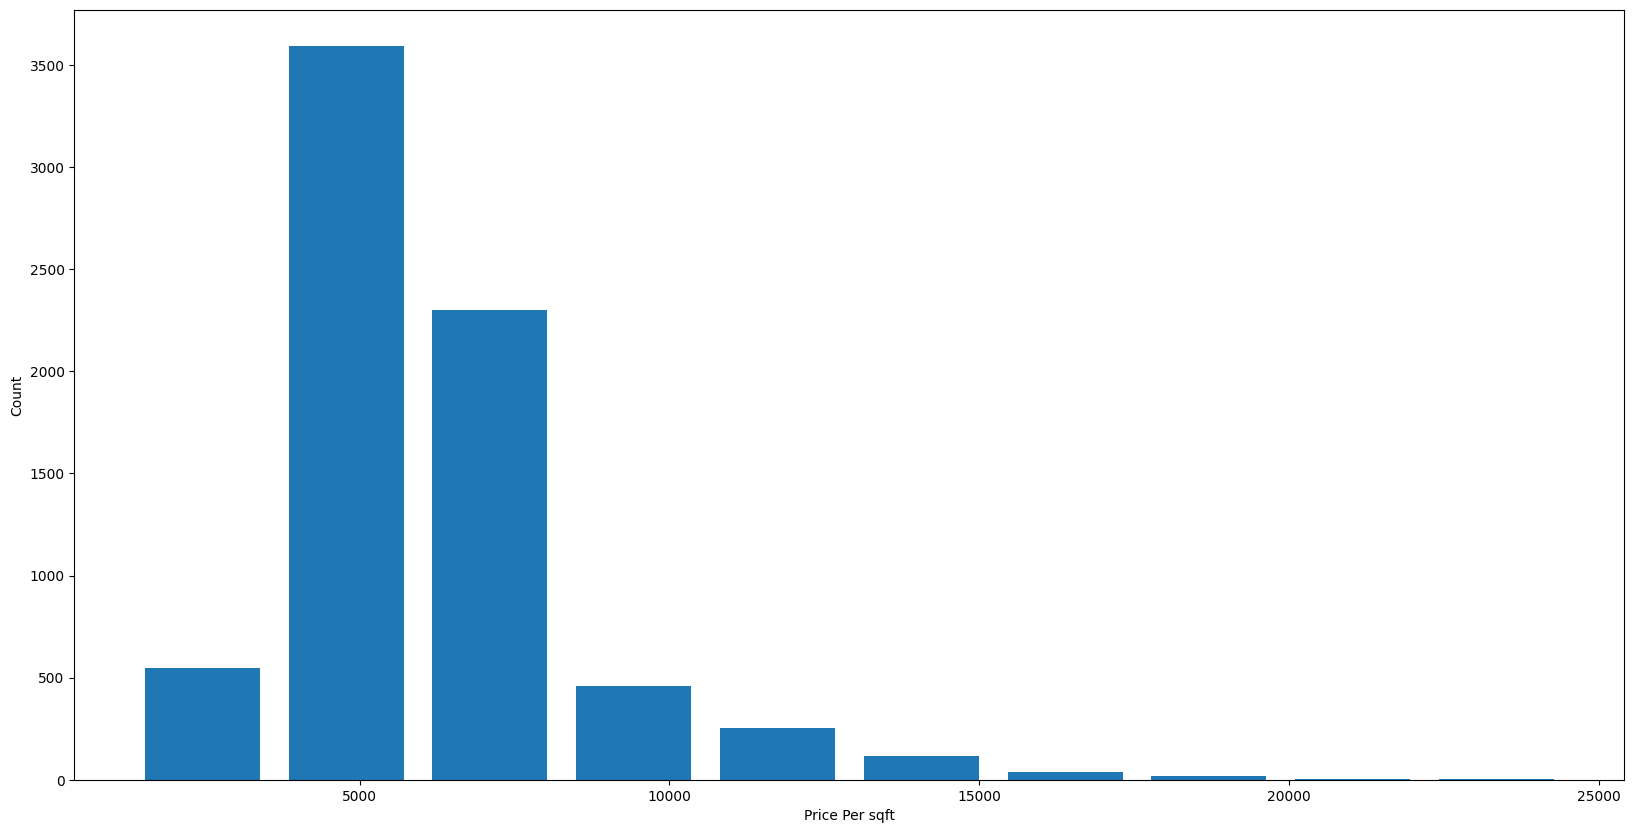

In [55]:
plt.figure(figsize=(20, 10))
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per sqft")
plt.ylabel("Count")

In [56]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [57]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

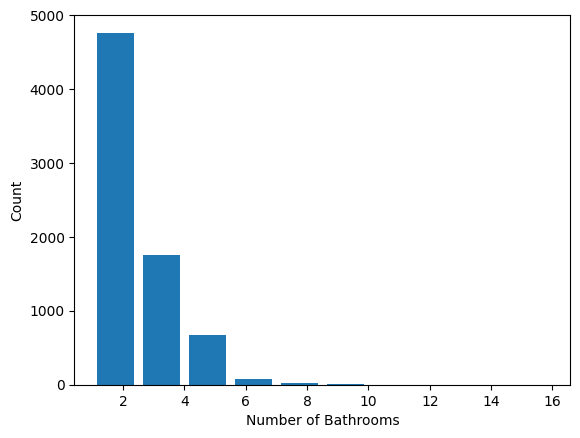

In [58]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")


In [59]:
df8[df8.bath<df8.bhk+2]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [60]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [61]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [62]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X.shape

(7251, 244)

In [67]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [69]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874384

In [70]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [72]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
    # print(x)
    return lr_clf.predict([x])

In [73]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([83.49904677])

In [74]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([86.80519395])

In [75]:
predict_price('Indira Nagar',1000, 2, 2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([181.27815484])

In [76]:
predict_price('Indira Nagar',1000, 3, 3)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([184.58430202])

In [77]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [78]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))